In [1]:
from pylab import plt, mpl
%matplotlib inline
import math
import numpy as np

In [2]:
plt.style.use( "seaborn" )
mpl.rcParams[ 'font.family' ] = 'serif'

In [3]:
import pandas as pd

In [4]:
print(pd.__version__)

1.2.0


# Basics with dataframe

In [5]:
df = pd.DataFrame( [10, 20, 30, 40],
                 columns = ['numbers'],
                 index = [ 'a', 'b', 'c', 'd' ])

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df

,numbers
a,10
b,20
c,30
d,40


In [8]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [9]:
df.columns

Index(['numbers'], dtype='object')

In [11]:
type( df.loc[ 'c' ] )

pandas.core.series.Series

In [11]:
df[ 'numbers' ]

a    10
b    20
c    30
d    40
Name: numbers, dtype: int64

In [13]:
type( df[ 'numbers' ] )

pandas.core.series.Series

In [14]:
df[ [ 'numbers' ] ]

,numbers
a,10
b,20
c,30
d,40


In [15]:
df.loc[ ['a', 'd'] ] #location

,numbers
a,10
d,40


In [16]:
type( df.loc[ ['a', 'd'] ] )

pandas.core.frame.DataFrame

In [17]:
df.iloc[ 1:3 ] #index location

,numbers
b,20
c,30


In [19]:
df

,numbers
a,10
b,20
c,30
d,40


In [19]:
df.sum()

numbers    100
dtype: int64

In [20]:
df.apply( lambda x: x**2 )

,numbers
a,100
b,400
c,900
d,1600


In [21]:
type( df.apply( lambda x: x**2 ) )

pandas.core.frame.DataFrame

In [22]:
df** 2

,numbers
a,100
b,400
c,900
d,1600


In [23]:
df*2

,numbers
a,20
b,40
c,60
d,80


In [24]:
df['float'] = [1.5, 2.5, 3.5, 4.5]

In [26]:
df

,numbers,float
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [27]:
pd.DataFrame( [ 'Yves', 'Sandra', 'Lilli', 'Henry' ], \
                           index = ['d', 'a', 'b', 'c'] )

,0
d,Yves
a,Sandra
b,Lilli
c,Henry


In [28]:
df['names'] = pd.DataFrame( [ 'Yves', 'Sandra', 'Lilli', 'Henry' ], \
                           index = ['d', 'a', 'b', 'c'] )

In [29]:
df

,numbers,float,names
a,10,1.5,Sandra
b,20,2.5,Lilli
c,30,3.5,Henry
d,40,4.5,Yves


In [23]:
pd.Series( ['A', 'A+', 'B', 'E'], index = ['a', 'd', 'b', 'c'] )

a     A
d    A+
b     B
c     E
dtype: object

In [30]:
df['score'] = pd.Series( ['A', 'A+', 'B', 'E'], index = ['a', 'd', 'b', 'c'] )

In [31]:
df

,numbers,float,names,score
a,10,1.5,Sandra,A
b,20,2.5,Lilli,B
c,30,3.5,Henry,E
d,40,4.5,Yves,A+


In [32]:
df['numbers']*df['float']

a     15.0
b     50.0
c    105.0
d    180.0
dtype: float64

# pandas Series

In [34]:
df

,numbers,float,names,score
a,10,1.5,Sandra,A
b,20,2.5,Lilli,B
c,30,3.5,Henry,E
d,40,4.5,Yves,A+


In [32]:
type( df.numbers )

pandas.core.series.Series

In [33]:
df['numbers']

a    10
b    20
c    30
d    40
Name: numbers, dtype: int64

In [35]:
df

,numbers,float,names,score
a,10,1.5,Sandra,A
b,20,2.5,Lilli,B
c,30,3.5,Henry,E
d,40,4.5,Yves,A+


In [38]:
df.mean()

numbers    25.0
float       3.0
dtype: float64

In [38]:
df.numbers.std()

12.909944487358056

In [39]:
df['numbers'].std()

12.909944487358056

In [39]:
df2 = df.append( { 'numbers': 100, 'float': 5.75, 'names': 'Jil', 'score': 'B' },\
                ignore_index = True )

In [40]:
df2

,numbers,float,names,score
0,10,1.50,Sandra,A
1,20,2.50,Lilli,B
2,30,3.50,Henry,E
3,40,4.50,Yves,A+
4,100,5.75,Jil,B


In [37]:
df.append( { 'numbers': 100, 'float': 5.75, 'names': 'Jil', 'score': 'B' }, \
          ignore_index = True )

,numbers,float,names,score
0,10,1.50,Sandra,A
1,20,2.50,Lilli,B
2,30,3.50,Henry,E
3,40,4.50,Yves,A+
4,100,5.75,Jil,B


In [41]:
df

,numbers,float,names,score
a,10,1.5,Sandra,A
b,20,2.5,Lilli,B
c,30,3.5,Henry,E
d,40,4.5,Yves,A+


In [41]:
pd.Series( [100, 5.75, 'Jil', 'B'],\
                     index = ["numbers", "float", "names", "score"], name = 'y')

numbers     100
float      5.75
names       Jil
score         B
Name: y, dtype: object

In [42]:
df.append( pd.Series( [100, 5.75, 'Jil', 'B'],\
                     index = ["numbers", "float", "names", "score"], name = 'y') )

,numbers,float,names,score
a,10,1.50,Sandra,A
b,20,2.50,Lilli,B
c,30,3.50,Henry,E
d,40,4.50,Yves,A+
y,100,5.75,Jil,B


In [43]:
df

,numbers,float,names,score
a,10,1.5,Sandra,A
b,20,2.5,Lilli,B
c,30,3.5,Henry,E
d,40,4.5,Yves,A+


In [41]:
pd.Series( ["Liz"], index = [ "names"], name = 'z')

names    Liz
Name: z, dtype: object

In [43]:
df3 =df.append( pd.Series( ["Liz"], index = [ "names"], name = 'z') )

In [44]:
df3

,numbers,float,names,score
a,10.0,1.5,Sandra,A
b,20.0,2.5,Lilli,B
c,30.0,3.5,Henry,E
d,40.0,4.5,Yves,A+
z,NaN,NaN,Liz,NaN


In [45]:
df3.loc[ 'z', 'numbers' ]

nan

In [47]:
type( df3.loc[ 'z', 'numbers' ] )

numpy.float64

In [46]:
np.nan == df3.loc[ 'z', 'numbers' ]

False

In [47]:
np.nan > 0

False

In [48]:
np.nan <= 0

False

In [47]:
pd.DataFrame( { 'names':'Liz' } , index = ['z'])

,names
z,Liz


In [48]:
df.append( pd.DataFrame( { 'names':'Liz' } , index = ['z']) )

,numbers,float,names,score
a,10.0,1.5,Sandra,A
b,20.0,2.5,Lilli,B
c,30.0,3.5,Henry,E
d,40.0,4.5,Yves,A+
z,NaN,NaN,Liz,NaN


In [49]:
df

,numbers,float,names,score
a,10,1.5,Sandra,A
b,20,2.5,Lilli,B
c,30,3.5,Henry,E
d,40,4.5,Yves,A+


In [50]:
df.dtypes

numbers      int64
float      float64
names       object
score       object
dtype: object

In [51]:
type(df)

pandas.core.frame.DataFrame

In [52]:
df.mean()

numbers    25.0
float       3.0
dtype: float64

In [53]:
df[ ["numbers","float"] ]

,numbers,float
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [54]:
df[ ["numbers","float"] ].mean()

numbers    25.0
float       3.0
dtype: float64

In [55]:
df[ ["numbers","float"] ].std()

numbers    12.909944
float       1.290994
dtype: float64

# Connection with numpy

In [56]:
np.random.seed( 100 )

In [57]:
a = np.random.standard_normal( ( 9, 4 ) )

In [58]:
a

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

In [59]:
df = pd.DataFrame( a )

In [60]:
df

,0,1,2,3
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


In [61]:
df.columns = [ 'No1', 'No2', 'No3', 'No4' ]

In [62]:
df

,No1,No2,No3,No4
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


In [63]:
df.values

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

### Date time range

In [64]:
dates = pd.date_range( '20190101', periods = 9, freq = 'M' ) #months

In [65]:
dates

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30'],
              dtype='datetime64[ns]', freq='M')

In [75]:
pd.date_range( '20190101', '20190120', freq = 'B' ) #business days

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18'],
              dtype='datetime64[ns]', freq='B')

In [15]:
pd.bdate_range( '20190101', '20190120') #business days

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18'],
              dtype='datetime64[ns]', freq='B')

In [66]:
pd.date_range( '20190101', '20200120', freq = 'Y')

DatetimeIndex(['2019-12-31'], dtype='datetime64[ns]', freq='A-DEC')

In [68]:
dates = pd.date_range( '20190101', periods=9, freq = 'M' )

In [69]:
dates

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30'],
              dtype='datetime64[ns]', freq='M')

In [67]:
df

,No1,No2,No3,No4
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


In [70]:
df.index = dates

In [71]:
df

,No1,No2,No3,No4
2019-01-31,-1.749765,0.342680,1.153036,-0.252436
2019-02-28,0.981321,0.514219,0.221180,-1.070043
2019-03-31,-0.189496,0.255001,-0.458027,0.435163
2019-04-30,-0.583595,0.816847,0.672721,-0.104411
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318
2019-06-30,1.618982,1.541605,-0.251879,-0.842436
2019-07-31,0.184519,0.937082,0.731000,1.361556
2019-08-31,-0.326238,0.055676,0.222400,-1.443217
2019-09-30,-0.756352,0.816454,0.750445,-0.455947


In [40]:
df.values

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

In [59]:
type(df)

pandas.core.frame.DataFrame

In [60]:
type( df.values )

numpy.ndarray

# Basic Analytics

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2019-01-31 to 2019-09-30
Freq: M
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No1     9 non-null      float64
 1   No2     9 non-null      float64
 2   No3     9 non-null      float64
 3   No4     9 non-null      float64
dtypes: float64(4)
memory usage: 360.0 bytes


In [74]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.150212,0.701033,0.289193,-0.387788
std,0.988306,0.457685,0.579920,0.877532
min,-1.749765,0.055676,-0.458027,-1.443217
25%,-0.583595,0.342680,-0.251879,-1.070043
50%,-0.326238,0.816454,0.222400,-0.455947
75%,0.184519,0.937082,0.731000,-0.104411
max,1.618982,1.541605,1.153036,1.361556


In [75]:
df.sum()

No1   -1.351906
No2    6.309298
No3    2.602739
No4   -3.490089
dtype: float64

In [76]:
df.mean()

No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [77]:
df.mean(axis = 0)

No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [79]:
df

,No1,No2,No3,No4
2019-01-31,-1.749765,0.342680,1.153036,-0.252436
2019-02-28,0.981321,0.514219,0.221180,-1.070043
2019-03-31,-0.189496,0.255001,-0.458027,0.435163
2019-04-30,-0.583595,0.816847,0.672721,-0.104411
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318
2019-06-30,1.618982,1.541605,-0.251879,-0.842436
2019-07-31,0.184519,0.937082,0.731000,1.361556
2019-08-31,-0.326238,0.055676,0.222400,-1.443217
2019-09-30,-0.756352,0.816454,0.750445,-0.455947


In [78]:
df.mean(axis = 1)

2019-01-31   -0.126621
2019-02-28    0.161669
2019-03-31    0.010661
2019-04-30    0.200390
2019-05-31   -0.264500
2019-06-30    0.516568
2019-07-31    0.803539
2019-08-31   -0.372845
2019-09-30    0.088650
Freq: M, dtype: float64

In [80]:
df

,No1,No2,No3,No4
2019-01-31,-1.749765,0.342680,1.153036,-0.252436
2019-02-28,0.981321,0.514219,0.221180,-1.070043
2019-03-31,-0.189496,0.255001,-0.458027,0.435163
2019-04-30,-0.583595,0.816847,0.672721,-0.104411
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318
2019-06-30,1.618982,1.541605,-0.251879,-0.842436
2019-07-31,0.184519,0.937082,0.731000,1.361556
2019-08-31,-0.326238,0.055676,0.222400,-1.443217
2019-09-30,-0.756352,0.816454,0.750445,-0.455947


In [87]:
df.cumsum() #cummulative sum

,No1,No2,No3,No4
2019-01-31,1.189622,-1.690617,-1.356399,-1.232435
2019-02-28,0.645183,-2.358789,-1.349084,-1.845373
2019-03-31,1.944931,-4.091884,-2.332395,-1.487865
2019-04-30,0.331353,-2.621170,-3.520412,-2.037612
2019-05-31,-0.608693,-3.449103,-3.411549,-1.529802
2019-06-30,-1.470921,-2.199633,-3.491160,-2.419534
2019-07-31,-2.352719,-2.180994,-3.253315,-2.405985
2019-08-31,-3.988249,-3.225204,-2.640276,-1.669780
2019-09-30,-2.961327,-4.657394,-4.481465,-1.303687


In [81]:
df

,No1,No2,No3,No4
2019-01-31,-1.749765,0.342680,1.153036,-0.252436
2019-02-28,0.981321,0.514219,0.221180,-1.070043
2019-03-31,-0.189496,0.255001,-0.458027,0.435163
2019-04-30,-0.583595,0.816847,0.672721,-0.104411
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318
2019-06-30,1.618982,1.541605,-0.251879,-0.842436
2019-07-31,0.184519,0.937082,0.731000,1.361556
2019-08-31,-0.326238,0.055676,0.222400,-1.443217
2019-09-30,-0.756352,0.816454,0.750445,-0.455947


In [82]:
df  = df/100

In [83]:
df

,No1,No2,No3,No4
2019-01-31,-0.017498,0.003427,0.011530,-0.002524
2019-02-28,0.009813,0.005142,0.002212,-0.010700
2019-03-31,-0.001895,0.002550,-0.004580,0.004352
2019-04-30,-0.005836,0.008168,0.006727,-0.001044
2019-05-31,-0.005313,0.010297,-0.004381,-0.011183
2019-06-30,0.016190,0.015416,-0.002519,-0.008424
2019-07-31,0.001845,0.009371,0.007310,0.013616
2019-08-31,-0.003262,0.000557,0.002224,-0.014432
2019-09-30,-0.007564,0.008165,0.007504,-0.004559


In [84]:
df.cumprod() #cummulative production

,No1,No2,No3,No4
2019-01-31,-1.749765e-02,3.426804e-03,1.153036e-02,-2.524360e-03
2019-02-28,-1.717081e-04,1.762127e-05,2.550281e-05,2.701175e-05
2019-03-31,3.253797e-07,4.493450e-08,-1.168097e-07,1.175453e-07
2019-04-30,-1.898900e-09,3.670461e-10,-7.858034e-10,-1.227304e-10
2019-05-31,1.008848e-11,3.779594e-12,3.442885e-12,1.372516e-12
2019-06-30,1.633307e-13,5.826642e-14,-8.671909e-15,-1.156257e-14
2019-07-31,3.013757e-16,5.460042e-16,-6.339168e-17,-1.574308e-16
2019-08-31,-9.832021e-19,3.039934e-19,-1.409829e-19,2.272068e-18
2019-09-30,7.436472e-21,2.481966e-21,-1.057998e-21,-1.035943e-20


In [85]:
(df + 1).cumprod()-1

,No1,No2,No3,No4
2019-01-31,-0.017498,0.003427,0.011530,-0.002524
2019-02-28,-0.007856,0.008587,0.013768,-0.013198
2019-03-31,-0.009736,0.011159,0.009124,-0.008904
2019-04-30,-0.015515,0.019418,0.015913,-0.009938
2019-05-31,-0.020746,0.029915,0.011462,-0.021010
2019-06-30,-0.004892,0.045793,0.008914,-0.029258
2019-07-31,-0.003056,0.055593,0.016289,-0.016041
2019-08-31,-0.006308,0.056180,0.018550,-0.030241
2019-09-30,-0.013824,0.064804,0.026193,-0.034663


# Numpy operations

In [86]:
np.mean(df)

No1   -0.001502
No2    0.007010
No3    0.002892
No4   -0.003878
dtype: float64

In [87]:
type( np.mean(df) )

pandas.core.series.Series

In [88]:
np.log(df)

,No1,No2,No3,No4
2019-01-31,NaN,-5.676127,-4.462772,NaN
2019-02-28,-4.624026,-5.270277,-6.113950,NaN
2019-03-31,NaN,-5.971656,NaN,-5.437204
2019-04-30,NaN,-4.807474,-5.001595,NaN
2019-05-31,NaN,-4.575871,NaN,NaN
2019-06-30,-4.123373,-4.172346,NaN,NaN
2019-07-31,-6.295175,-4.670154,-4.918512,-4.296542
2019-08-31,NaN,-7.493376,-6.108450,NaN
2019-09-30,NaN,-4.807955,-4.892259,NaN


In [90]:
np.log(df.abs())

,No1,No2,No3,No4
2019-01-31,-4.045688,-5.676127,-4.462772,-5.981768
2019-02-28,-4.624026,-5.270277,-6.113950,-4.537471
2019-03-31,-6.268558,-5.971656,-5.385997,-5.437204
2019-04-30,-5.143718,-4.807474,-5.001595,-6.864589
2019-05-31,-5.237636,-4.575871,-5.430397,-4.493344
2019-06-30,-4.123373,-4.172346,-5.983976,-4.776628
2019-07-31,-6.295175,-4.670154,-4.918512,-4.296542
2019-08-31,-5.725298,-7.493376,-6.108450,-4.238296
2019-09-30,-4.884418,-4.807955,-4.892259,-5.390549


In [91]:
np.sqrt(df.abs()) #square root

,No1,No2,No3,No4
2019-01-31,0.132279,0.058539,0.107380,0.050243
2019-02-28,0.099062,0.071709,0.047030,0.103443
2019-03-31,0.043531,0.050498,0.067678,0.065967
2019-04-30,0.076393,0.090380,0.082020,0.032313
2019-05-31,0.072889,0.101476,0.066192,0.105751
2019-06-30,0.127239,0.124161,0.050188,0.091784
2019-07-31,0.042956,0.096803,0.085499,0.116686
2019-08-31,0.057117,0.023596,0.047159,0.120134
2019-09-30,0.086969,0.090358,0.086628,0.067524


In [92]:
np.sqrt(df.abs()).sum()

No1    0.738434
No2    0.707519
No3    0.639772
No4    0.753844
dtype: float64

In [93]:
100*df + 100

,No1,No2,No3,No4
2019-01-31,98.250235,100.342680,101.153036,99.747564
2019-02-28,100.981321,100.514219,100.221180,98.929957
2019-03-31,99.810504,100.255001,99.541973,100.435163
2019-04-30,99.416405,100.816847,100.672721,99.895589
2019-05-31,99.468720,101.029733,99.561864,98.881682
2019-06-30,101.618982,101.541605,99.748121,99.157564
2019-07-31,100.184519,100.937082,100.731000,101.361556
2019-08-31,99.673762,100.055676,100.222400,98.556783
2019-09-30,99.243648,100.816454,100.750445,99.544053


In [94]:
df

,No1,No2,No3,No4
2019-01-31,-0.017498,0.003427,0.011530,-0.002524
2019-02-28,0.009813,0.005142,0.002212,-0.010700
2019-03-31,-0.001895,0.002550,-0.004580,0.004352
2019-04-30,-0.005836,0.008168,0.006727,-0.001044
2019-05-31,-0.005313,0.010297,-0.004381,-0.011183
2019-06-30,0.016190,0.015416,-0.002519,-0.008424
2019-07-31,0.001845,0.009371,0.007310,0.013616
2019-08-31,-0.003262,0.000557,0.002224,-0.014432
2019-09-30,-0.007564,0.008165,0.007504,-0.004559


# In class exercise:

Compute mean squared error between columns No1 and No2.

In [103]:
np.mean((df.No1-df.No2)**2)

0.0004300177740589787

In [104]:
((df.No1-df.No2)**2).mean()

0.0004300177740589787

# Visualization

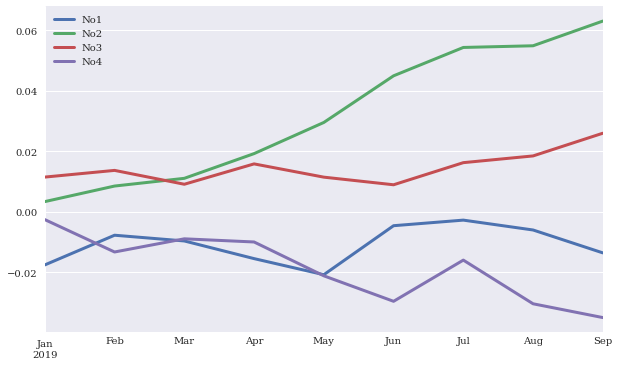

In [95]:
df.cumsum().plot( lw=3.0, figsize = (10, 6) )

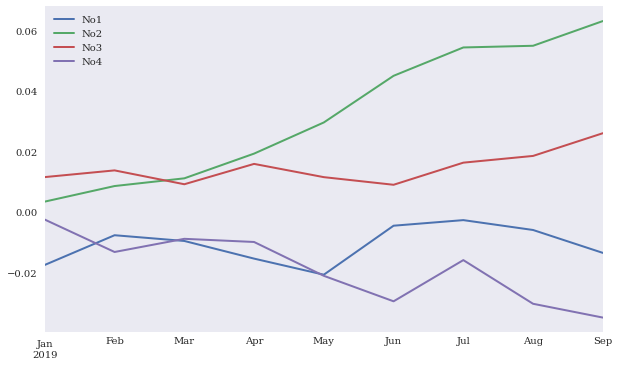

In [96]:
df.cumsum().plot( lw=2.0, figsize = (10, 6), grid = False )

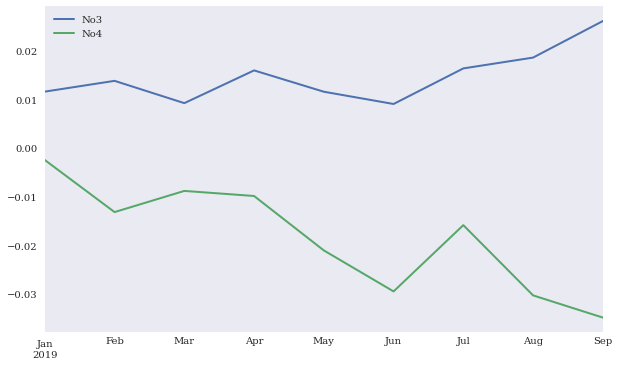

In [104]:
df.cumsum()[ ['No3', 'No4'] ].plot(  lw=2.0, figsize = (10, 6), grid = False )

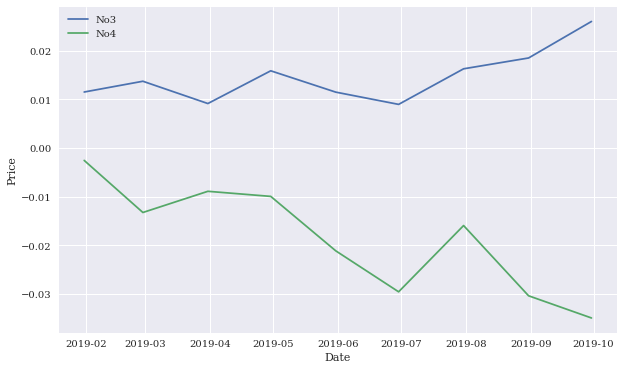

In [100]:
plt.figure( figsize = ( 10, 6 ) )
#plt.plot( df.cumsum().No1, label='No1' )
#plt.plot( df.cumsum().No2, label='No2' )
plt.plot( df.cumsum().No3, label='No3' )
plt.plot( df.cumsum().No4, label='No4' )
plt.ylabel( 'Price' )
plt.xlabel( 'Date' )
plt.legend()

Text(0.5, 0, 'Date')

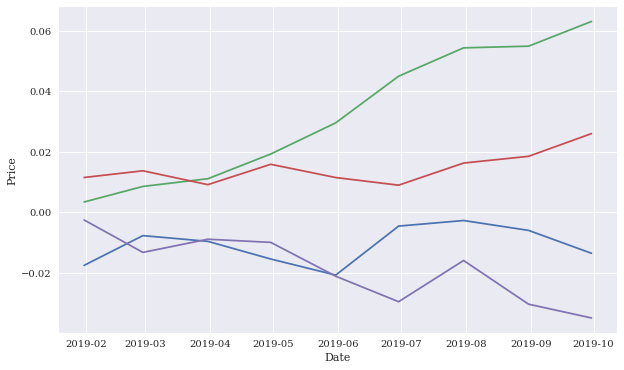

In [102]:
plt.figure( figsize = ( 10, 6 ) )
plt.plot( df.cumsum() )
plt.ylabel( 'Price' )
plt.xlabel( 'Date' )

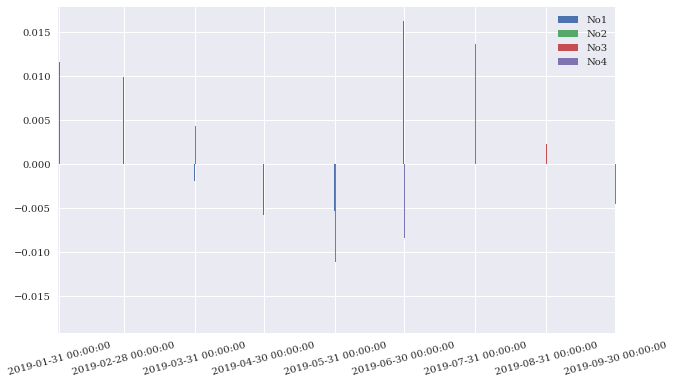

In [108]:
df.plot.bar( figsize = (10, 6), rot = 15 )

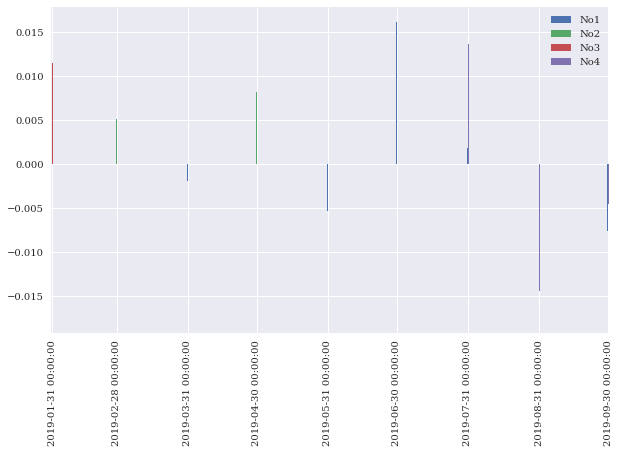

In [110]:
df.plot.bar( figsize = (10, 6) )

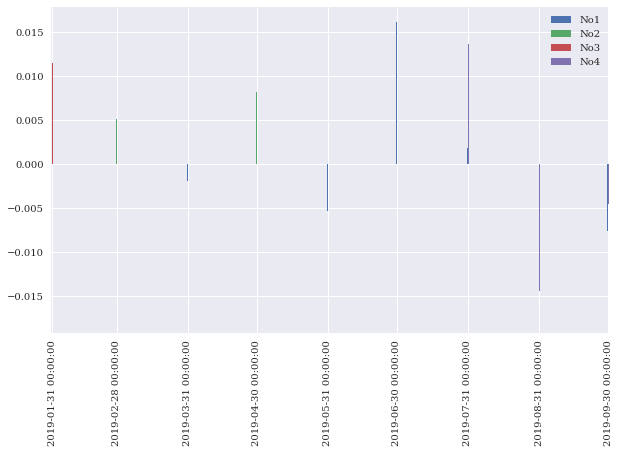

In [111]:
df.plot( kind = 'bar', figsize = ( 10, 6 ) )

# Groupby

In [113]:
df.index

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30'],
              dtype='datetime64[ns]', freq='M')

In [114]:
df.index.quarter

Int64Index([1, 1, 1, 2, 2, 2, 3, 3, 3], dtype='int64')

In [115]:
df[ 'quarter' ] = df.index.quarter

In [116]:
df

,No1,No2,No3,No4,quarter
2019-01-31,-0.017498,0.003427,0.011530,-0.002524,1
2019-02-28,0.009813,0.005142,0.002212,-0.010700,1
2019-03-31,-0.001895,0.002550,-0.004580,0.004352,1
2019-04-30,-0.005836,0.008168,0.006727,-0.001044,2
2019-05-31,-0.005313,0.010297,-0.004381,-0.011183,2
2019-06-30,0.016190,0.015416,-0.002519,-0.008424,2
2019-07-31,0.001845,0.009371,0.007310,0.013616,3
2019-08-31,-0.003262,0.000557,0.002224,-0.014432,3
2019-09-30,-0.007564,0.008165,0.007504,-0.004559,3


In [117]:
df[ 'quarter' ] = pd.PeriodIndex(df.index, freq='Q')

In [118]:
df

,No1,No2,No3,No4,quarter
2019-01-31,-0.017498,0.003427,0.011530,-0.002524,2019Q1
2019-02-28,0.009813,0.005142,0.002212,-0.010700,2019Q1
2019-03-31,-0.001895,0.002550,-0.004580,0.004352,2019Q1
2019-04-30,-0.005836,0.008168,0.006727,-0.001044,2019Q2
2019-05-31,-0.005313,0.010297,-0.004381,-0.011183,2019Q2
2019-06-30,0.016190,0.015416,-0.002519,-0.008424,2019Q2
2019-07-31,0.001845,0.009371,0.007310,0.013616,2019Q3
2019-08-31,-0.003262,0.000557,0.002224,-0.014432,2019Q3
2019-09-30,-0.007564,0.008165,0.007504,-0.004559,2019Q3


In [119]:
group = df.groupby( 'quarter' )

In [120]:
type(group)

pandas.core.groupby.generic.DataFrameGroupBy

In [117]:
group

In [121]:
group.size()

quarter
2019Q1    3
2019Q2    3
2019Q3    3
Freq: Q-DEC, dtype: int64

In [122]:
group.mean()

,No1,No2,No3,No4
quarter,,,,
2019Q1,-0.003193,0.003706,0.003054,-0.002958
2019Q2,0.001680,0.011294,-0.000058,-0.006884
2019Q3,-0.002994,0.006031,0.005679,-0.001792


In [120]:
group.max()

,No1,No2,No3,No4
quarter,,,,
2019Q1,0.012997,-0.006682,0.000073,0.003575
2019Q2,-0.008622,0.014707,0.001089,0.005078
2019Q3,0.010269,0.000186,0.006130,0.007362


In [121]:
group.sum()

,No1,No2,No3,No4
quarter,,,,
2019Q1,0.019449,-0.040919,-0.023324,-0.014879
2019Q2,-0.034159,0.018923,-0.011588,-0.009317
2019Q3,-0.014904,-0.024578,-0.009903,0.011158


In [123]:
group.aggregate( [min, max] ).round(2)

No1         No2        No3         No4      
          min   max   min   max  min   max   min   max
quarter                                               
2019Q1  -0.02  0.01  0.00  0.01 -0.0  0.01 -0.01  0.00
2019Q2  -0.01  0.02  0.01  0.02 -0.0  0.01 -0.01 -0.00
2019Q3  -0.01  0.00  0.00  0.01  0.0  0.01 -0.01  0.01

In [124]:
df[ 'odd even' ] = (df.index).map( lambda x: "Odd" if x.month%2 else "Even")

In [125]:
df

,No1,No2,No3,No4,quarter,odd even
2019-01-31,-0.017498,0.003427,0.011530,-0.002524,2019Q1,Odd
2019-02-28,0.009813,0.005142,0.002212,-0.010700,2019Q1,Even
2019-03-31,-0.001895,0.002550,-0.004580,0.004352,2019Q1,Odd
2019-04-30,-0.005836,0.008168,0.006727,-0.001044,2019Q2,Even
2019-05-31,-0.005313,0.010297,-0.004381,-0.011183,2019Q2,Odd
2019-06-30,0.016190,0.015416,-0.002519,-0.008424,2019Q2,Even
2019-07-31,0.001845,0.009371,0.007310,0.013616,2019Q3,Odd
2019-08-31,-0.003262,0.000557,0.002224,-0.014432,2019Q3,Even
2019-09-30,-0.007564,0.008165,0.007504,-0.004559,2019Q3,Odd


In [124]:
(df.index).map( lambda x: "Odd" if x.month%2 else "Even")

Index(['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd'], dtype='object')

In [128]:
group2 = df.groupby( [ 'quarter', 'odd even' ] )

In [129]:
group2.size()

quarter  odd even
2019Q1   Even        1
         Odd         2
2019Q2   Even        2
         Odd         1
2019Q3   Even        1
         Odd         2
dtype: int64

In [130]:
group2.aggregate( [ sum, np.mean ] )

No1                 No2                 No3            \
                       sum      mean       sum      mean       sum      mean   
quarter odd even                                                               
2019Q1  Even      0.009813  0.009813  0.005142  0.005142  0.002212  0.002212   
        Odd      -0.019393 -0.009696  0.005977  0.002988  0.006950  0.003475   
2019Q2  Even      0.010354  0.005177  0.023585  0.011792  0.004208  0.002104   
        Odd      -0.005313 -0.005313  0.010297  0.010297 -0.004381 -0.004381   
2019Q3  Even     -0.003262 -0.003262  0.000557  0.000557  0.002224  0.002224   
        Odd      -0.005718 -0.002859  0.017535  0.008768  0.014814  0.007407   

                       No4            
                       sum      mean  
quarter odd even                      
2019Q1  Even     -0.010700 -0.010700  
        Odd       0.001827  0.000914  
2019Q2  Even     -0.009468 -0.004734  
        Odd      -0.011183 -0.011183  
2019Q3  Even     -0.014432 -0.014432  
        Odd       0.009056  0.004528

In [132]:
def square_sum(x):
    if x.empty:
        return None
    else: 
        return (x**2).sum()
        

In [133]:
square_sum( pd.Series( [1,2,3] ) )

14

In [134]:
group2.aggregate( square_sum )

No1           No2       No3       No4
quarter odd even                                            
2019Q1  Even      0.000096  2.644210e-05  0.000005  0.000114
        Odd       0.000310  1.824556e-05  0.000154  0.000025
2019Q2  Even      0.000296  3.043786e-04  0.000052  0.000072
        Odd       0.000028  1.060349e-04  0.000019  0.000125
2019Q3  Even      0.000011  3.099819e-07  0.000005  0.000208
        Odd       0.000061  1.544720e-04  0.000110  0.000206

# Data Selection

In [135]:
df

,No1,No2,No3,No4,quarter,odd even
2019-01-31,-0.017498,0.003427,0.011530,-0.002524,2019Q1,Odd
2019-02-28,0.009813,0.005142,0.002212,-0.010700,2019Q1,Even
2019-03-31,-0.001895,0.002550,-0.004580,0.004352,2019Q1,Odd
2019-04-30,-0.005836,0.008168,0.006727,-0.001044,2019Q2,Even
2019-05-31,-0.005313,0.010297,-0.004381,-0.011183,2019Q2,Odd
2019-06-30,0.016190,0.015416,-0.002519,-0.008424,2019Q2,Even
2019-07-31,0.001845,0.009371,0.007310,0.013616,2019Q3,Odd
2019-08-31,-0.003262,0.000557,0.002224,-0.014432,2019Q3,Even
2019-09-30,-0.007564,0.008165,0.007504,-0.004559,2019Q3,Odd


In [138]:
df.head( 3 )

,No1,No2,No3,No4,quarter,odd even
2019-01-31,-0.017498,0.003427,0.011530,-0.002524,2019Q1,Odd
2019-02-28,0.009813,0.005142,0.002212,-0.010700,2019Q1,Even
2019-03-31,-0.001895,0.002550,-0.004580,0.004352,2019Q1,Odd


In [139]:
df.tail( 3 )

,No1,No2,No3,No4,quarter,odd even
2019-07-31,0.001845,0.009371,0.007310,0.013616,2019Q3,Odd
2019-08-31,-0.003262,0.000557,0.002224,-0.014432,2019Q3,Even
2019-09-30,-0.007564,0.008165,0.007504,-0.004559,2019Q3,Odd


In [136]:
df[ 'No1' ]

2019-01-31    0.011896
2019-02-28   -0.005444
2019-03-31    0.012997
2019-04-30   -0.016136
2019-05-31   -0.009400
2019-06-30   -0.008622
2019-07-31   -0.008818
2019-08-31   -0.016355
2019-09-30    0.010269
Freq: M, Name: No1, dtype: float64

In [140]:
df[ 'No1' ]>0.005

2019-01-31    False
2019-02-28     True
2019-03-31    False
2019-04-30    False
2019-05-31    False
2019-06-30     True
2019-07-31    False
2019-08-31    False
2019-09-30    False
Freq: M, Name: No1, dtype: bool

In [141]:
df[df[ 'No1' ]>0.005]

,No1,No2,No3,No4,quarter,odd even
2019-02-28,0.009813,0.005142,0.002212,-0.010700,2019Q1,Even
2019-06-30,0.016190,0.015416,-0.002519,-0.008424,2019Q2,Even


In [142]:
df[~(df[ 'No1' ]>0.005)]

,No1,No2,No3,No4,quarter,odd even
2019-01-31,-0.017498,0.003427,0.011530,-0.002524,2019Q1,Odd
2019-03-31,-0.001895,0.002550,-0.004580,0.004352,2019Q1,Odd
2019-04-30,-0.005836,0.008168,0.006727,-0.001044,2019Q2,Even
2019-05-31,-0.005313,0.010297,-0.004381,-0.011183,2019Q2,Odd
2019-07-31,0.001845,0.009371,0.007310,0.013616,2019Q3,Odd
2019-08-31,-0.003262,0.000557,0.002224,-0.014432,2019Q3,Even
2019-09-30,-0.007564,0.008165,0.007504,-0.004559,2019Q3,Odd


In [112]:
~(df[ 'No1' ]>0.005)

2019-01-31     True
2019-02-28    False
2019-03-31     True
2019-04-30     True
2019-05-31     True
2019-06-30    False
2019-07-31     True
2019-08-31     True
2019-09-30     True
Freq: M, Name: No1, dtype: bool

In [114]:
df[ 'No2' ]<0.005

2019-01-31     True
2019-02-28    False
2019-03-31     True
2019-04-30    False
2019-05-31    False
2019-06-30    False
2019-07-31    False
2019-08-31     True
2019-09-30    False
Freq: M, Name: No2, dtype: bool

In [144]:
(df[ 'No1' ]>0.005)|(df[ 'No2' ]<0.005)

2019-01-31     True
2019-02-28     True
2019-03-31     True
2019-04-30    False
2019-05-31    False
2019-06-30     True
2019-07-31    False
2019-08-31     True
2019-09-30    False
Freq: M, dtype: bool

In [147]:
df[ (df[ 'No1' ]>0.005)|(df[ 'No2' ]<0.005) ]

,No1,No2,No3,No4,quarter,odd even
2019-01-31,-0.017498,0.003427,0.011530,-0.002524,2019Q1,Odd
2019-02-28,0.009813,0.005142,0.002212,-0.010700,2019Q1,Even
2019-03-31,-0.001895,0.002550,-0.004580,0.004352,2019Q1,Odd
2019-06-30,0.016190,0.015416,-0.002519,-0.008424,2019Q2,Even
2019-08-31,-0.003262,0.000557,0.002224,-0.014432,2019Q3,Even


In [142]:
df

,No1,No2,No3,No4,quarter,odd even
2019-01-31,0.011896,-0.016906,-0.013564,-0.012324,2019Q1,Odd
2019-02-28,-0.005444,-0.006682,0.000073,-0.006129,2019Q1,Even
2019-03-31,0.012997,-0.017331,-0.009833,0.003575,2019Q1,Odd
2019-04-30,-0.016136,0.014707,-0.011880,-0.005497,2019Q2,Even
2019-05-31,-0.009400,-0.008279,0.001089,0.005078,2019Q2,Odd
2019-06-30,-0.008622,0.012495,-0.000796,-0.008897,2019Q2,Even
2019-07-31,-0.008818,0.000186,0.002378,0.000135,2019Q3,Odd
2019-08-31,-0.016355,-0.010442,0.006130,0.007362,2019Q3,Even
2019-09-30,0.010269,-0.014322,-0.018412,0.003661,2019Q3,Odd


In [148]:
df>0

TypeError: Invalid comparison between dtype=period[Q-DEC] and int

In [144]:
df[ [ 'No1', 'No2', 'No3', 'No4' ] ]>0

,No1,No2,No3,No4
2019-01-31,True,False,False,False
2019-02-28,False,False,True,False
2019-03-31,True,False,False,True
2019-04-30,False,True,False,False
2019-05-31,False,False,True,True
2019-06-30,False,True,False,False
2019-07-31,False,True,True,True
2019-08-31,False,False,True,True
2019-09-30,True,False,False,True


In [150]:
df[df[ [ 'No1', 'No2', 'No3', 'No4' ] ]>0]

,No1,No2,No3,No4,quarter,odd even
2019-01-31,NaN,0.003427,0.011530,NaN,NaT,NaN
2019-02-28,0.009813,0.005142,0.002212,NaN,NaT,NaN
2019-03-31,NaN,0.002550,NaN,0.004352,NaT,NaN
2019-04-30,NaN,0.008168,0.006727,NaN,NaT,NaN
2019-05-31,NaN,0.010297,NaN,NaN,NaT,NaN
2019-06-30,0.016190,0.015416,NaN,NaN,NaT,NaN
2019-07-31,0.001845,0.009371,0.007310,0.013616,NaT,NaN
2019-08-31,NaN,0.000557,0.002224,NaN,NaT,NaN
2019-09-30,NaN,0.008165,0.007504,NaN,NaT,NaN


In [151]:
df[[ 'No1', 'No2', 'No3', 'No4' ]][df[ [ 'No1', 'No2', 'No3', 'No4' ] ]>0]

,No1,No2,No3,No4
2019-01-31,NaN,0.003427,0.011530,NaN
2019-02-28,0.009813,0.005142,0.002212,NaN
2019-03-31,NaN,0.002550,NaN,0.004352
2019-04-30,NaN,0.008168,0.006727,NaN
2019-05-31,NaN,0.010297,NaN,NaN
2019-06-30,0.016190,0.015416,NaN,NaN
2019-07-31,0.001845,0.009371,0.007310,0.013616
2019-08-31,NaN,0.000557,0.002224,NaN
2019-09-30,NaN,0.008165,0.007504,NaN


In [147]:
df

,No1,No2,No3,No4,quarter,odd even
2019-01-31,0.011896,-0.016906,-0.013564,-0.012324,2019Q1,Odd
2019-02-28,-0.005444,-0.006682,0.000073,-0.006129,2019Q1,Even
2019-03-31,0.012997,-0.017331,-0.009833,0.003575,2019Q1,Odd
2019-04-30,-0.016136,0.014707,-0.011880,-0.005497,2019Q2,Even
2019-05-31,-0.009400,-0.008279,0.001089,0.005078,2019Q2,Odd
2019-06-30,-0.008622,0.012495,-0.000796,-0.008897,2019Q2,Even
2019-07-31,-0.008818,0.000186,0.002378,0.000135,2019Q3,Odd
2019-08-31,-0.016355,-0.010442,0.006130,0.007362,2019Q3,Even
2019-09-30,0.010269,-0.014322,-0.018412,0.003661,2019Q3,Odd


# In class exercise:

Select all odd month from df.

In [148]:
df[ df[ 'odd even' ] == 'Odd' ]

,No1,No2,No3,No4,quarter,odd even
2019-01-31,0.011896,-0.016906,-0.013564,-0.012324,2019Q1,Odd
2019-03-31,0.012997,-0.017331,-0.009833,0.003575,2019Q1,Odd
2019-05-31,-0.009400,-0.008279,0.001089,0.005078,2019Q2,Odd
2019-07-31,-0.008818,0.000186,0.002378,0.000135,2019Q3,Odd
2019-09-30,0.010269,-0.014322,-0.018412,0.003661,2019Q3,Odd


# pivot

In [124]:
df

,No1,No2,No3,No4,quarter,odd even
2019-01-31,-0.017498,0.003427,0.011530,-0.002524,2019Q1,Odd
2019-02-28,0.009813,0.005142,0.002212,-0.010700,2019Q1,Even
2019-03-31,-0.001895,0.002550,-0.004580,0.004352,2019Q1,Odd
2019-04-30,-0.005836,0.008168,0.006727,-0.001044,2019Q2,Even
2019-05-31,-0.005313,0.010297,-0.004381,-0.011183,2019Q2,Odd
2019-06-30,0.016190,0.015416,-0.002519,-0.008424,2019Q2,Even
2019-07-31,0.001845,0.009371,0.007310,0.013616,2019Q3,Odd
2019-08-31,-0.003262,0.000557,0.002224,-0.014432,2019Q3,Even
2019-09-30,-0.007564,0.008165,0.007504,-0.004559,2019Q3,Odd


In [125]:
df[ 'month number' ] = (df.index).map( lambda x: x.month%3)

In [126]:
df

,No1,No2,No3,No4,quarter,odd even,month number
2019-01-31,-0.017498,0.003427,0.011530,-0.002524,2019Q1,Odd,1
2019-02-28,0.009813,0.005142,0.002212,-0.010700,2019Q1,Even,2
2019-03-31,-0.001895,0.002550,-0.004580,0.004352,2019Q1,Odd,0
2019-04-30,-0.005836,0.008168,0.006727,-0.001044,2019Q2,Even,1
2019-05-31,-0.005313,0.010297,-0.004381,-0.011183,2019Q2,Odd,2
2019-06-30,0.016190,0.015416,-0.002519,-0.008424,2019Q2,Even,0
2019-07-31,0.001845,0.009371,0.007310,0.013616,2019Q3,Odd,1
2019-08-31,-0.003262,0.000557,0.002224,-0.014432,2019Q3,Even,2
2019-09-30,-0.007564,0.008165,0.007504,-0.004559,2019Q3,Odd,0


In [127]:
df.pivot(index = 'month number', columns = 'quarter', values = 'No1' )

quarter,2019Q1,2019Q2,2019Q3
month number,,,
0,-0.001895,0.016190,-0.007564
1,-0.017498,-0.005836,0.001845
2,0.009813,-0.005313,-0.003262


# Stack

In [152]:
df

,No1,No2,No3,No4,quarter,odd even
2019-01-31,-0.017498,0.003427,0.011530,-0.002524,2019Q1,Odd
2019-02-28,0.009813,0.005142,0.002212,-0.010700,2019Q1,Even
2019-03-31,-0.001895,0.002550,-0.004580,0.004352,2019Q1,Odd
2019-04-30,-0.005836,0.008168,0.006727,-0.001044,2019Q2,Even
2019-05-31,-0.005313,0.010297,-0.004381,-0.011183,2019Q2,Odd
2019-06-30,0.016190,0.015416,-0.002519,-0.008424,2019Q2,Even
2019-07-31,0.001845,0.009371,0.007310,0.013616,2019Q3,Odd
2019-08-31,-0.003262,0.000557,0.002224,-0.014432,2019Q3,Even
2019-09-30,-0.007564,0.008165,0.007504,-0.004559,2019Q3,Odd


In [153]:
dfstack = df.stack()

In [154]:
dfstack

2019-01-31  No1        -0.017498
            No2         0.003427
            No3         0.011530
            No4        -0.002524
            quarter       2019Q1
            odd even         Odd
2019-02-28  No1         0.009813
            No2         0.005142
            No3         0.002212
            No4        -0.010700
            quarter       2019Q1
            odd even        Even
2019-03-31  No1        -0.001895
            No2         0.002550
            No3        -0.004580
            No4         0.004352
            quarter       2019Q1
            odd even         Odd
2019-04-30  No1        -0.005836
            No2         0.008168
            No3         0.006727
            No4        -0.001044
            quarter       2019Q2
            odd even        Even
2019-05-31  No1        -0.005313
            No2         0.010297
            No3        -0.004381
            No4        -0.011183
            quarter       2019Q2
            odd even         Odd
2019-06-30

In [131]:
dfstack.unstack( level = 1 )

,No1,No2,No3,No4,quarter,odd even,month number
2019-01-31,-0.017498,0.003427,0.011530,-0.002524,2019Q1,Odd,1
2019-02-28,0.009813,0.005142,0.002212,-0.010700,2019Q1,Even,2
2019-03-31,-0.001895,0.002550,-0.004580,0.004352,2019Q1,Odd,0
2019-04-30,-0.005836,0.008168,0.006727,-0.001044,2019Q2,Even,1
2019-05-31,-0.005313,0.010297,-0.004381,-0.011183,2019Q2,Odd,2
2019-06-30,0.016190,0.015416,-0.002519,-0.008424,2019Q2,Even,0
2019-07-31,0.001845,0.009371,0.007310,0.013616,2019Q3,Odd,1
2019-08-31,-0.003262,0.000557,0.002224,-0.014432,2019Q3,Even,2
2019-09-30,-0.007564,0.008165,0.007504,-0.004559,2019Q3,Odd,0


# Iterate

In [64]:
for index, row in df.iterrows():
    print( index)
    print( row )
    print( "_"*15 )

2019-01-31 00:00:00
No1         -1.74977
No2          0.34268
No3          1.15304
No4        -0.252436
quarter       2019Q1
odd even         Odd
Name: 2019-01-31 00:00:00, dtype: object
_______________
2019-02-28 00:00:00
No1         0.981321
No2         0.514219
No3          0.22118
No4         -1.07004
quarter       2019Q1
odd even        Even
Name: 2019-02-28 00:00:00, dtype: object
_______________
2019-03-31 00:00:00
No1        -0.189496
No2         0.255001
No3        -0.458027
No4         0.435163
quarter       2019Q1
odd even         Odd
Name: 2019-03-31 00:00:00, dtype: object
_______________
2019-04-30 00:00:00
No1        -0.583595
No2         0.816847
No3         0.672721
No4        -0.104411
quarter       2019Q2
odd even        Even
Name: 2019-04-30 00:00:00, dtype: object
_______________
2019-05-31 00:00:00
No1         -0.53128
No2          1.02973
No3        -0.438136
No4         -1.11832
quarter       2019Q2
odd even         Odd
Name: 2019-05-31 00:00:00, dtype: object
_

In [141]:
for ind in df.index:
    print(df.loc[index])

No1            -0.756352
No2             0.816454
No3             0.750445
No4            -0.455947
quarter           2019Q3
odd even             Odd
month number           0
Name: 2019-09-30 00:00:00, dtype: object
No1            -0.756352
No2             0.816454
No3             0.750445
No4            -0.455947
quarter           2019Q3
odd even             Odd
month number           0
Name: 2019-09-30 00:00:00, dtype: object
No1            -0.756352
No2             0.816454
No3             0.750445
No4            -0.455947
quarter           2019Q3
odd even             Odd
month number           0
Name: 2019-09-30 00:00:00, dtype: object
No1            -0.756352
No2             0.816454
No3             0.750445
No4            -0.455947
quarter           2019Q3
odd even             Odd
month number           0
Name: 2019-09-30 00:00:00, dtype: object
No1            -0.756352
No2             0.816454
No3             0.750445
No4            -0.455947
quarter           2019Q3
odd even   

In [142]:
for col in df.columns:
    print(df[col])

2019-01-31   -1.749765
2019-02-28    0.981321
2019-03-31   -0.189496
2019-04-30   -0.583595
2019-05-31   -0.531280
2019-06-30    1.618982
2019-07-31    0.184519
2019-08-31   -0.326238
2019-09-30   -0.756352
Freq: M, Name: No1, dtype: float64
2019-01-31    0.342680
2019-02-28    0.514219
2019-03-31    0.255001
2019-04-30    0.816847
2019-05-31    1.029733
2019-06-30    1.541605
2019-07-31    0.937082
2019-08-31    0.055676
2019-09-30    0.816454
Freq: M, Name: No2, dtype: float64
2019-01-31    1.153036
2019-02-28    0.221180
2019-03-31   -0.458027
2019-04-30    0.672721
2019-05-31   -0.438136
2019-06-30   -0.251879
2019-07-31    0.731000
2019-08-31    0.222400
2019-09-30    0.750445
Freq: M, Name: No3, dtype: float64
2019-01-31   -0.252436
2019-02-28   -1.070043
2019-03-31    0.435163
2019-04-30   -0.104411
2019-05-31   -1.118318
2019-06-30   -0.842436
2019-07-31    1.361556
2019-08-31   -1.443217
2019-09-30   -0.455947
Freq: M, Name: No4, dtype: float64
2019-01-31    2019Q1
2019-02-28 

# Query

In [81]:
df[ df['No1']>0 ]


,No1,No2,No3,No4,quarter,odd even
2019-02-28,0.981321,0.514219,0.221180,-1.070043,2019Q1,Even
2019-06-30,1.618982,1.541605,-0.251879,-0.842436,2019Q2,Even
2019-07-31,0.184519,0.937082,0.731000,1.361556,2019Q3,Odd


In [82]:
df.query( 'No1>0' )

,No1,No2,No3,No4,quarter,odd even
2019-02-28,0.981321,0.514219,0.221180,-1.070043,2019Q1,Even
2019-06-30,1.618982,1.541605,-0.251879,-0.842436,2019Q2,Even
2019-07-31,0.184519,0.937082,0.731000,1.361556,2019Q3,Odd


In [145]:
df.query( 'No1>0 & No4<0' )

,No1,No2,No3,No4,quarter,odd even,month number
2019-02-28,0.981321,0.514219,0.221180,-1.070043,2019Q1,Even,2
2019-06-30,1.618982,1.541605,-0.251879,-0.842436,2019Q2,Even,0


In [146]:
df

,No1,No2,No3,No4,quarter,odd even,month number
2019-01-31,-1.749765,0.342680,1.153036,-0.252436,2019Q1,Odd,1
2019-02-28,0.981321,0.514219,0.221180,-1.070043,2019Q1,Even,2
2019-03-31,-0.189496,0.255001,-0.458027,0.435163,2019Q1,Odd,0
2019-04-30,-0.583595,0.816847,0.672721,-0.104411,2019Q2,Even,1
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318,2019Q2,Odd,2
2019-06-30,1.618982,1.541605,-0.251879,-0.842436,2019Q2,Even,0
2019-07-31,0.184519,0.937082,0.731000,1.361556,2019Q3,Odd,1
2019-08-31,-0.326238,0.055676,0.222400,-1.443217,2019Q3,Even,2
2019-09-30,-0.756352,0.816454,0.750445,-0.455947,2019Q3,Odd,0


# In class exercise

Select column No1, find the rows with No1>0 and format those entries into percentage.

In [149]:
df['No1'].loc[ df['No1']>0 ].apply( lambda x : '{:.2f}%'.format( x*100 ) )

2019-01-31    1.19%
2019-03-31    1.30%
2019-09-30    1.03%
Name: No1, dtype: object

In [150]:
df['No1'].loc[ df['No1']>0 ] = df['No1'].loc[ df['No1']>0 ].apply( \
                                lambda x : '{:.2f}%'.format( x*100 ) )

/Users/xiahua/anaconda3/envs/py3/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [151]:
df

,No1,No2,No3,No4,quarter,odd even
2019-01-31,1.19%,-0.016906,-0.013564,-0.012324,2019Q1,Odd
2019-02-28,-0.005444,-0.006682,0.000073,-0.006129,2019Q1,Even
2019-03-31,1.30%,-0.017331,-0.009833,0.003575,2019Q1,Odd
2019-04-30,-0.016136,0.014707,-0.011880,-0.005497,2019Q2,Even
2019-05-31,-0.009400,-0.008279,0.001089,0.005078,2019Q2,Odd
2019-06-30,-0.008622,0.012495,-0.000796,-0.008897,2019Q2,Even
2019-07-31,-0.008818,0.000186,0.002378,0.000135,2019Q3,Odd
2019-08-31,-0.016355,-0.010442,0.006130,0.007362,2019Q3,Even
2019-09-30,1.03%,-0.014322,-0.018412,0.003661,2019Q3,Odd
